CROP RECOMMENDATION AND YIELD PREDICTION RECOMMENDATION

In [167]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [168]:
path1="/content/Crop_recommendation.csv"
path2="/content/apy.csv"
path3='/content/yield_df.csv'


In [169]:
data_crop=pd.read_csv(path1)
data_yield=pd.read_csv(path3)


In [170]:
print(data_crop['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [171]:
print(data_yield.Item.unique())

['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']


In [172]:
data_crop.iloc[40]


N                      62
P                      42
K                      36
temperature     22.781338
humidity        82.067191
ph                6.43001
rainfall       248.718323
label                rice
Name: 40, dtype: object

In [173]:
print(data_yield.Area.unique())

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Tajikistan

In [174]:
data_yield=data_yield.loc[data_yield.Area =="Morocco"]
data_yield

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
20471,20471,Morocco,Maize,1990,11598,346.0,9364.0,18.17
20472,20472,Morocco,Maize,1990,11598,346.0,9364.0,18.29
20473,20473,Morocco,Potatoes,1990,171851,346.0,9364.0,18.17
20474,20474,Morocco,Potatoes,1990,171851,346.0,9364.0,18.29
20475,20475,Morocco,"Rice, paddy",1990,41750,346.0,9364.0,18.17
...,...,...,...,...,...,...,...,...
20788,20788,Morocco,Soybeans,2013,10000,346.0,13697.0,18.62
20789,20789,Morocco,Sweet potatoes,2013,245134,346.0,13697.0,18.79
20790,20790,Morocco,Sweet potatoes,2013,245134,346.0,13697.0,18.62
20791,20791,Morocco,Wheat,2013,21640,346.0,13697.0,18.79


Recommendation

In [175]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [176]:
X=data_crop.drop('label',axis=1)
y=data_crop['label']
print('X values:',X)
print('y values:',y)

X values:         N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
y values: 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2

In [177]:
from sklearn.preprocessing import LabelEncoder

lE=LabelEncoder()
y=lE.fit_transform(y)
print(y)


[20 20 20 ...  5  5  5]


In [178]:
y=y.reshape(-1,1)
print(X.shape)
print(y.shape)

(2200, 7)
(2200, 1)


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=40)

In [180]:
model=Sequential()
model.add(Dense(units=100, input_dim=X.shape[1], activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(22, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history=model.fit(X_train, y_train, validation_split=0.2,batch_size=20, epochs=50, verbose=1 )

Epoch 1/50
71/71 [==============================] - 1s 5ms/step - loss: 6.1480 - acc: 0.3161 - val_loss: 0.9152 - val_acc: 0.6705
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: 1.1292 - acc: 0.6442 - val_loss: 0.4034 - val_acc: 0.8778
Epoch 3/50
71/71 [==============================] - 0s 3ms/step - loss: 0.6271 - acc: 0.7891 - val_loss: 0.3034 - val_acc: 0.9091
Epoch 4/50
71/71 [==============================] - 0s 3ms/step - loss: 0.4707 - acc: 0.8445 - val_loss: 0.2218 - val_acc: 0.9261
Epoch 5/50
71/71 [==============================] - 0s 3ms/step - loss: 0.3939 - acc: 0.8651 - val_loss: 0.2217 - val_acc: 0.9261
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: 0.3051 - acc: 0.8935 - val_loss: 0.2287 - val_acc: 0.9062
Epoch 7/50
71/71 [==============================] - 0s 3ms/step - loss: 0.2999 - acc: 0.8942 - val_loss: 0.1568 - val_acc: 0.9517
Epoch 8/50
71/71 [==============================] - 0s 3ms/step - loss: 0.2647 - acc: 0.90

In [181]:
hist=pd.DataFrame(history.history)
hist.head(10)

,loss,acc,val_loss,val_acc
0,6.147987,0.316051,0.915161,0.670455
1,1.129154,0.644176,0.403363,0.877841
2,0.627146,0.789062,0.303376,0.909091
3,0.470715,0.844460,0.221819,0.926136
4,0.393859,0.865057,0.221651,0.926136
5,0.305073,0.893466,0.228720,0.906250
6,0.299875,0.894176,0.156762,0.951705
7,0.264745,0.906960,0.156179,0.934659
8,0.251873,0.911932,0.169365,0.946023
9,0.236919,0.911222,0.166953,0.928977


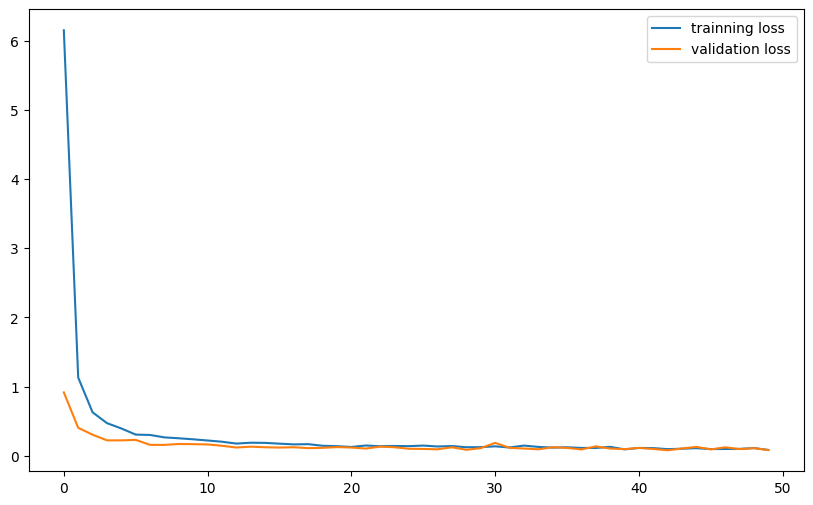

In [182]:
plt.figure(figsize=(10,6))
plt.plot(hist['loss'], label='trainning loss')
plt.plot(hist['val_loss'], label='validation loss')
plt.legend()
plt.show()

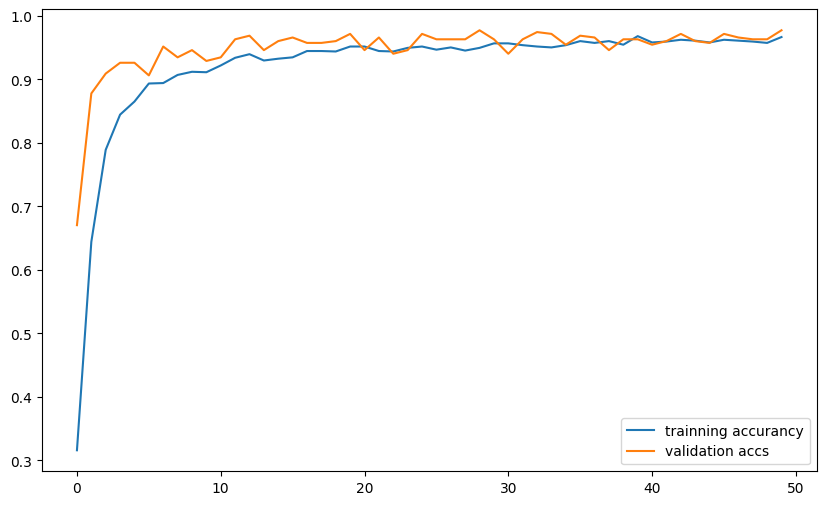

In [183]:
plt.figure(figsize=(10,6))
plt.plot(hist['acc'], label='trainning accurancy')
plt.plot(hist['val_acc'], label='validation accs')
plt.legend()
plt.show()

In [184]:
pred=model.predict(X_test, verbose=1)

14/14 [==============================] - 0s 2ms/step


In [185]:
def pred_pipe(X,y):
  pred=model.predict(X,verbose=1)
  p=[]
  for n in pred:
    p.append(np.argmax(n))
  out=pd.DataFrame({'Predict':lE.inverse_transform(p), 'Actual':lE.inverse_transform(y)})
  return out

In [186]:
pred_pipe(X_test, y_test)

14/14 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Predict,Actual
0,blackgram,blackgram
1,papaya,papaya
2,coffee,coffee
3,grapes,grapes
4,mango,mango
...,...,...
435,cotton,cotton
436,banana,banana
437,chickpea,chickpea
438,apple,apple


In [187]:
import pickle
with open('crop.pkl', 'wb') as file:
    pickle.dump(lE, file)

In [188]:
testX=np.asarray(data_crop.iloc[260].values[:-1]).astype(np.float32).reshape(1,-1)

testy=np.array(data_crop.iloc[260].values[-1]).reshape(1,-1)[0]

print(testX)
print(testy)
pred=model.predict(testX, verbose=1)
lE.inverse_transform(np.array(np.argmax(pred)).reshape(1,-1))[0]

[[24.        56.        85.        18.199036  17.413332   6.5458884
  80.64054  ]]
['chickpea']
1/1 [==============================] - 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'chickpea'

In [189]:
np.argmax(pred)

3

YIELD RECOMMENDATION

In [190]:
data_yield=pd.read_csv(path3)

In [191]:
X=data_yield.drop(columns=['hg/ha_yield','Area','Unnamed: 0'])
y=data_yield['hg/ha_yield']

In [192]:
y_t=X.columns
y_t

Index(['Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp'],
      dtype='object')

In [193]:
lE1=LabelEncoder()
X['Item']=lE1.fit_transform(X['Item'])
with open('yield_item.pkl','wb') as file:
   pickle.dump(lE1,  file)

In [194]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

X_train1, X_test1, y_train1, y_test1=train_test_split(X,y, test_size=0.2, random_state=40)

xgb_r=xgb.XGBRegressor(objective='reg:linear', n_estimator=10, seed=40)

xgb_r.fit(X_train1, y_train1)

pred=xgb_r.predict(X_test1)
rmse=np.sqrt(MSE(y_test1, pred))
print(f'RMSE: {rmse}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:42:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:42:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 14772.677439530493


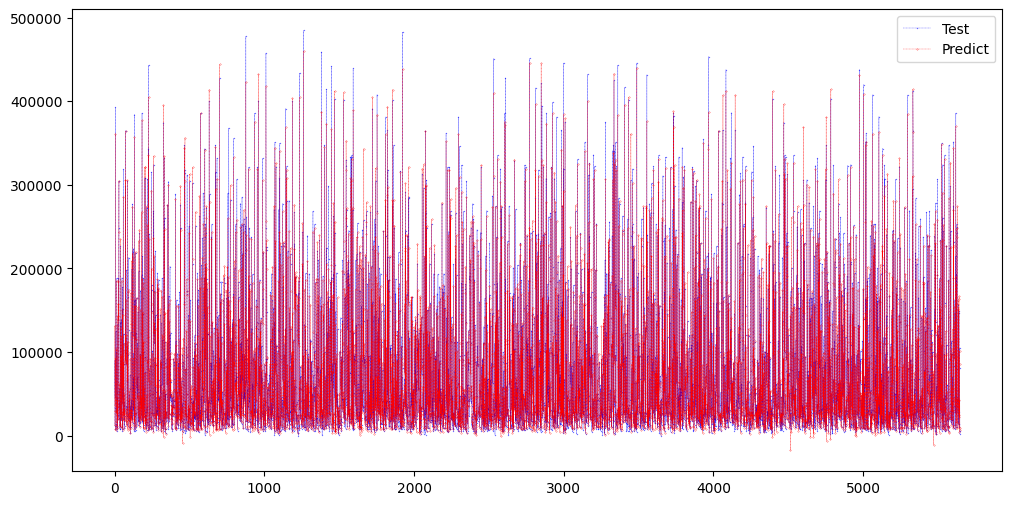

In [195]:
plt.figure(figsize=(12,6))
plt.plot(y_test1.values,'b+--', markersize=0.2, linewidth=0.2, label='Test')
plt.plot(pred, 'ro--', markersize=0.2, linewidth=0.2, label='Predict')
plt.legend()
plt.show()

In [196]:
def pred_pipe1(df,y):
  with open ("yield_item.pkl",'rb') as file:
     ln1=pickle.load(file)
     df['Item']=ln1.transform(df["Item"])
     X=df.values.reshape(1,-1)
     pred=xgb_r.predict(X)
  return pred

In [197]:
X=np.array(['Cassava',1990,1089.0,75000.0,25.58]).reshape(1,-1)
y=np.array([205381])
# Use one-hot encoding for the 'Item' column
df_encoded = pd.DataFrame(X, columns=y_t)
print(df_encoded)
print(pred_pipe1(df_encoded,y))
print(y)

      Item  Year average_rain_fall_mm_per_year pesticides_tonnes avg_temp
0  Cassava  1990                        1089.0           75000.0    25.58
[210564.11]
[205381]


In [198]:
xgb_r.save_model('yield.json')
with open ("yield.pkl", 'wb') as file:
  pickle.dump(xgb_r,file)
